In [24]:
import numpy.random as np
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from tqdm import tqdm_notebook as tqdm
sns.set()

parr = numpy.exp(numpy.arange(-24, -14)) #Mutation rate
narr = numpy.exp(numpy.arange(14, 25)) #Cell number
garr = numpy.array([0.03125, 0.0625, 0.125, 0.25, 0.5]) #Growth rate increment

ndiv = 10 #Number of cell divisions per year
age = 90 #Lifespan
time = ndiv*age #Duration of the simulation
n_mut = numpy.zeros(time, dtype=int) #Number of mutations

threshold = 5 #Mutation threshold for cancer
n = narr[-1] #Carrying capacity
p = parr[-1] #Mutation rate
m = numpy.zeros((threshold+1)*time).reshape((threshold+1), time)

g_inc = garr[-1]
g = numpy.linspace(0.1, 2, num=threshold+1) #Growth rate progression
d = g[0]/10 #Constant death rate
m[0] = n

for t in range(time):
    
    n_mut[t] = n_mut[t-1]
    m[:, t] = m[:, t-1]
    p_mut = 1-(1-p)**m[n_mut[t], t]

    if p_mut > np.random_sample(): #New mutant population
        n_mut[t] += 1
        m[n_mut[t], t] = 1.0
        p_mut = 1-((1-p)**m[n_mut[t], t])
        m[n_mut[t]-1, t] -= 1.0

    elif n_mut[t] > 0: #Growth of existing mutant or normal population, as the case may be
        m[:, t] += (m[:, t-1]*g*(n-m[:, t-1].sum())/n) - m[:, t-1]*d
        p_mut = 1-(1-p)**m[n_mut[t], t]

    if n_mut[t] == threshold:
        break

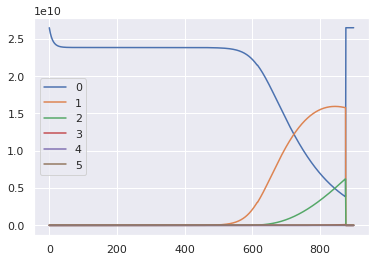

In [25]:
for i,l in zip(m, numpy.arange(threshold+1)):
    plt.plot(i, label=l)
plt.legend()

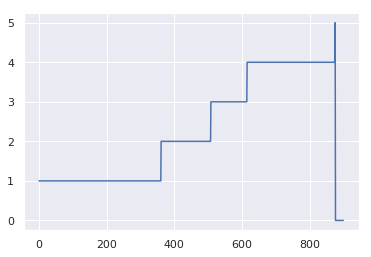

In [26]:
plt.plot(n_mut)

## Weird dynamics between mutant populations
- For the usual range of g and slightly larger lifespans, the populations begin to cycle and seem to reach stable oscillations with little convergence. 